# David Kartchner
# CS 501
# Lab 2: Perceptron

In [1]:
import numpy as np
import numpy.linalg as la
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from __future__ import division
%matplotlib inline

## Perceptron Function
**We build a function that trains our perceptron and plots pretty pictures of the accuracy**


In [2]:
def perceptron(x, y, W, learning_rates=[1, .1, .01], iters=100, plot=True):
    n_weights = len(W)
    cutoff = 0
    eps = 1e-8
    y = y.astype(float)
    n_samples = y.shape[0]
    accuracy = []
    weights = []
    
    plt.figure(figsize=(12,12))
    
    for rate in learning_rates:
        w = W.copy().reshape((n_weights,1))
        accuracy = []
        weights = []
        for i in xrange(iters):
            weights.append(la.norm(w))
            #Keep track of accuracy at each iteration
            y_hat = np.array(x.dot(w)>cutoff).astype('float').reshape(n_samples,1)
            diff = y - y_hat
            accuracy.append(1-(np.sum(np.abs(diff))/len(diff)))
            
            #Now iterate through the samples and update the weights
            for j in xrange(n_samples):
                #First calculate the estimates values for y based on our linear classifier
                yj_hat = float(x[j,:].dot(w)>cutoff)
                diff_j = y[j]-yj_hat

                #Now update our weights based on our prediction
                w += (rate)*diff_j*x[j,:].reshape((n_weights,1))
            
            
            
        
        if plot:
            plt.subplot(211)
            plt.title("Predictive Accuracy Over Time", fontsize=20)
            plt.xlabel("Epochs", fontsize=16)
            plt.ylabel("Accuracy(%)", fontsize=16)
            plt.plot(range(iters),accuracy, label=rate)
            plt.legend()

            plt.subplot(212)
            plt.title("Norm of Weight Vector Over Time", fontsize=20)
            plt.xlabel("Epochs", fontsize=16)
            plt.ylabel("Magnitude of Weight Vector (Log Scale)", fontsize=16)
            plt.plot(range(iters),np.log(weights), label=rate)
            plt.legend()
            
            plt.tight_layout()
    
    if plot:
        plt.show()
    
    
    

## Iris Dataset
**Test our perceptron on the Iris dataset with two different learning rates.  
We expect the algorithm to converge in one step since the data are linearly seprable**

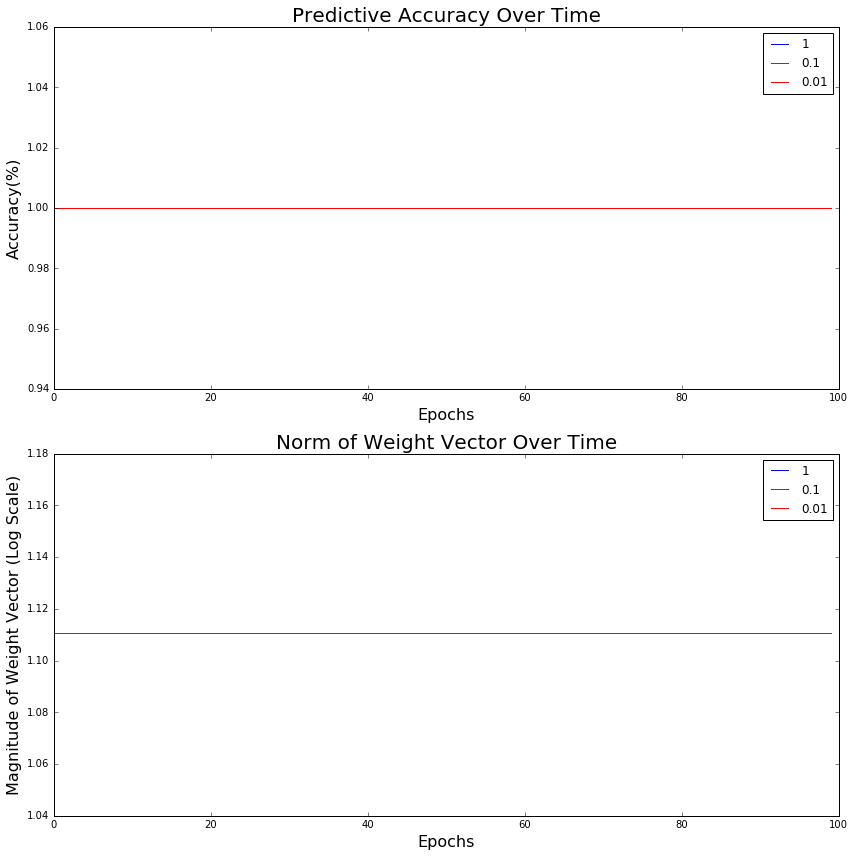

In [3]:
data = pd.read_csv( 'Fisher.csv' )
m = data.as_matrix()
labels = m[:,0]
labels[ labels==2 ] = 1  # squash class 2 into class 1
labels = np.atleast_2d( labels ).T
features = m.copy()
#Add a column of ones for the bias
m[:,0] = 1
w = np.random.randn(5)
perceptron(features, labels, w)


## CIFAR Dataset
**Now we see how well our perceptron can classify pictures  
If intuition is any indicator, we'll be happy with anything above 50%**

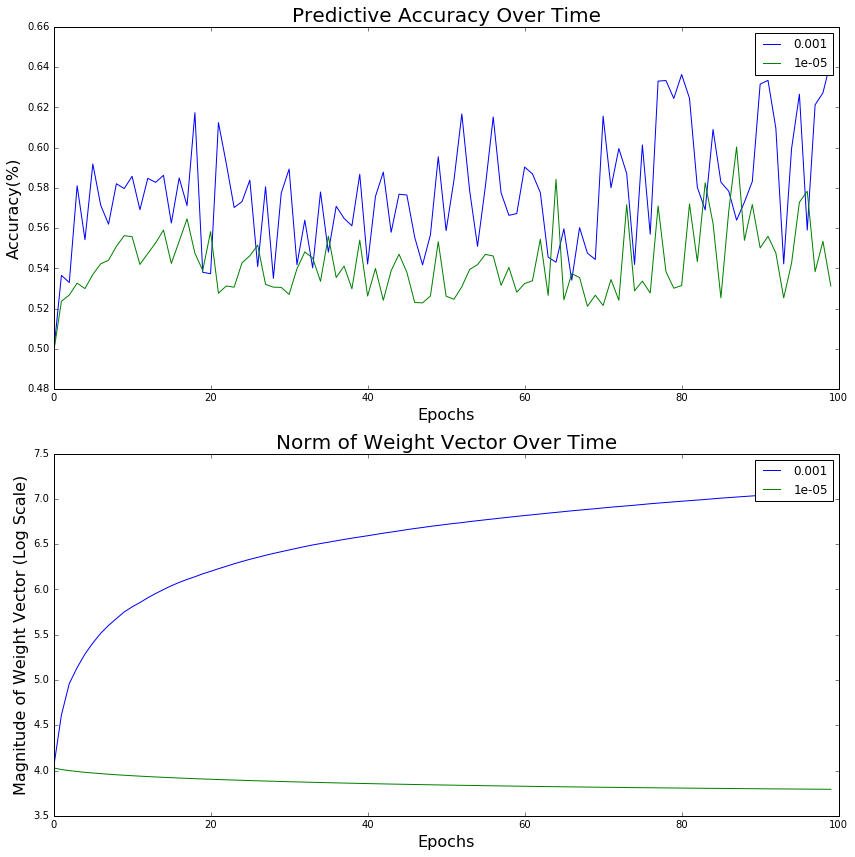

In [4]:
def unpickle( file ):
    fo = open(file, 'rb')
    dict = pickle.load(fo)
    fo.close()
    return dict
 
data = unpickle( 'cifar-10-batches-py/data_batch_1' )
 
features = data['data']
labels = data['labels']
labels = np.atleast_2d( labels ).T
 
# squash classes 0-4 into class 0, and squash classes 5-9 into class 1
labels[ labels < 5 ] = 0
labels[ labels >= 5 ] = 1

#Add a bias column to our feature vectors
m,n = features.shape
feats = np.ones((m,n+1))
feats[:,1:] = features

W = np.random.normal(0,1,n+1)
perceptron(feats, labels,W, learning_rates=[.001,1e-5])
